<a href="https://colab.research.google.com/github/enkiddoo/Digital-Institute-/blob/master/Taxi_fare_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

წელი გადავაქციო კატეგორიულ ცვლადად, კვირის დღეები გადავაქციო 0 თუ შაბათ-კვირაა, 1 თუ სამუშაო დღეები. შევცვალო გამა ალფა და ლამბდა პარამეტრები.

შეიძლება ცვლადების დამატება გრძედებს და განედებს შორის სხვაობა

*დავამატო ამინდი scrapingით. beautifulsoup

# kaggle api, importing dataset from competition | other necessary imports



In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download new-york-city-taxi-fare-prediction

 99% 1.55G/1.56G [00:11<00:00, 153MB/s]
100% 1.56G/1.56G [00:11<00:00, 143MB/s]


In [ ]:
! unzip /content/new-york-city-taxi-fare-prediction.zip

Archive:  /content/new-york-city-taxi-fare-prediction.zip
  inflating: GCP-Coupons-Instructions.rtf  
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
pip install haversine

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine, Unit
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [ ]:
Train=pd.read_csv('/content/train.csv')

In [ ]:
Train_data=Train.sample(n=50000, random_state=92)

In [ ]:
Test_data=pd.read_csv('/content/test.csv')

In [ ]:
Test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
subs=pd.read_csv('/content/sample_submission.csv')

In [ ]:
subs=subs.fare_amount

#  Overall check of data, missing vallues percentage(dropped missing values since the percantage is ver low)

In [ ]:
Test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
Train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
44077317,2012-02-13 19:43:00.000000244,5.7,2012-02-13 19:43:00 UTC,-73.990842,40.745222,-73.994258,40.756485,1
53845938,2011-04-26 15:11:00.000000210,6.1,2011-04-26 15:11:00 UTC,-73.961957,40.779632,-73.954770,40.770702,1
41392005,2013-02-13 09:36:00.000000131,9.0,2013-02-13 09:36:00 UTC,-73.982162,40.762472,-73.965065,40.772247,1
17002933,2010-10-26 13:54:28.0000002,9.7,2010-10-26 13:54:28 UTC,-73.992808,40.742588,-73.976201,40.762811,1
26382955,2011-06-06 12:53:54.0000002,6.9,2011-06-06 12:53:54 UTC,-73.967815,40.761440,-73.972194,40.744145,1


In [ ]:
Test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [ ]:
Train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,49999.000000,49999.000000,50000.000000
mean,11.255176,-72.541051,39.953814,-72.544561,39.957462,1.689420
std,9.569811,10.294192,6.203476,10.277584,6.182388,1.309379
min,-6.000000,-89.933333,-74.002072,-79.034145,-74.004812,0.000000
25%,6.000000,-73.992137,40.735036,-73.991383,40.734161,1.000000
50%,8.500000,-73.981858,40.752608,-73.980260,40.753307,1.000000
75%,12.500000,-73.967270,40.767054,-73.963807,40.767964,2.000000
max,226.000000,40.775827,409.016667,40.799670,404.133332,6.000000


In [ ]:
Test_data.isnull().sum()

,0
key,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
Train_data.isnull().sum()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0


In [ ]:
null_percentage_test = Test_data.isnull().mean() * 100
print(null_percentage_test)

key                  0.0
pickup_datetime      0.0
pickup_longitude     0.0
pickup_latitude      0.0
dropoff_longitude    0.0
dropoff_latitude     0.0
passenger_count      0.0
dtype: float64


In [ ]:
null_percentage = Train_data.isnull().mean() * 100
print(null_percentage)

key                  0.000
fare_amount          0.000
pickup_datetime      0.000
pickup_longitude     0.000
pickup_latitude      0.000
dropoff_longitude    0.002
dropoff_latitude     0.002
passenger_count      0.000
dtype: float64


In [ ]:
Train_data = Train_data.dropna()

In [ ]:
Train_data.dtypes

,0
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [ ]:
def remove_outliers_IQR(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        filter = (df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))
        df = df.loc[filter]
    return df

# Remove outliers in numerical columns
df_cleaned = remove_outliers_IQR(Train_data, ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])

In [ ]:
Train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,11.255003,-72.541023,39.953798,-72.544561,39.957462,1.689454
std,9.569828,10.294293,6.203537,10.277584,6.182388,1.309371
min,-6.000000,-89.933333,-74.002072,-79.034145,-74.004812,0.000000
25%,6.000000,-73.992137,40.735036,-73.991383,40.734161,1.000000
50%,8.500000,-73.981858,40.752607,-73.980260,40.753307,1.000000
75%,12.500000,-73.967270,40.767055,-73.963807,40.767964,2.000000
max,226.000000,40.775827,409.016667,40.799670,404.133332,6.000000




#  got separate columns from pickup_datetime, such as hour, day of the month, day of the week, year and etc to catch the relation between those and fare amount

In [ ]:
Train_data['pickup_datetime'] = pd.to_datetime(Train_data['pickup_datetime'])

In [ ]:
Test_data['pickup_datetime'] = pd.to_datetime(Test_data['pickup_datetime'])

In [ ]:
Train_data.dtypes

,0
key,object
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [ ]:
Train_data['hour'] = Train_data['pickup_datetime'].dt.hour
Train_data['day_of_week'] = Train_data['pickup_datetime'].dt.dayofweek
Train_data['day_of_month'] = Train_data['pickup_datetime'].dt.day
Train_data['month'] = Train_data['pickup_datetime'].dt.month
Train_data['year'] = Train_data['pickup_datetime'].dt.year

In [ ]:
Test_data["hour"] = Test_data["pickup_datetime"].dt.hour
Test_data["day_of_week"] = Test_data["pickup_datetime"].dt.dayofweek
Test_data["day_of_month"] = Test_data["pickup_datetime"].dt.day
Test_data["month"] = Test_data["pickup_datetime"].dt.month
Test_data["year"] = Test_data["pickup_datetime"].dt.year

In [ ]:
Train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,month,year
44077317,2012-02-13 19:43:00.000000244,5.7,2012-02-13 19:43:00+00:00,-73.990842,40.745222,-73.994258,40.756485,1,19,0,13,2,2012
53845938,2011-04-26 15:11:00.000000210,6.1,2011-04-26 15:11:00+00:00,-73.961957,40.779632,-73.954770,40.770702,1,15,1,26,4,2011
41392005,2013-02-13 09:36:00.000000131,9.0,2013-02-13 09:36:00+00:00,-73.982162,40.762472,-73.965065,40.772247,1,9,2,13,2,2013
17002933,2010-10-26 13:54:28.0000002,9.7,2010-10-26 13:54:28+00:00,-73.992808,40.742588,-73.976201,40.762811,1,13,1,26,10,2010
26382955,2011-06-06 12:53:54.0000002,6.9,2011-06-06 12:53:54+00:00,-73.967815,40.761440,-73.972194,40.744145,1,12,0,6,6,2011


In [ ]:
Train_data.day_of_week.unique()

array([0, 1, 2, 6, 4, 5, 3], dtype=int32)

In [ ]:
Train_data.hour.unique()

array([19, 15,  9, 13, 12, 17, 20, 16, 11, 21,  3, 14, 23, 18,  8,  0, 22,
        6, 10,  7,  5,  1,  2,  4], dtype=int32)

In [ ]:
Train_data.day_of_month.unique()

array([13, 26,  6,  9, 16, 21, 12,  7, 30, 18, 15, 29, 10, 25, 20, 11, 28,
       24,  2,  8, 19, 22,  3, 17,  1, 14, 27, 31,  4,  5, 23],
      dtype=int32)

In [ ]:
Train_data.month.unique()

array([ 2,  4, 10,  6,  3, 12,  5, 11,  7,  8,  9,  1], dtype=int32)

In [ ]:
Train_data.year.unique()

array([2012, 2011, 2013, 2010, 2014, 2009, 2015], dtype=int32)

In [ ]:
def time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

In [ ]:
Train_data['time_of_day'] = Train_data['hour'].apply(time_of_day)

In [ ]:
Test_data['time_of_day'] = Test_data['hour'].apply(time_of_day)

აღვნიშნოთ შაბათ კვირა და ასევე ძირითადი დრო როდესაც საცობებია

In [ ]:
Train_data['is_weekend'] = Train_data['day_of_week'].isin([5, 6]).astype(int)
Train_data['rush_hour'] = Train_data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)
Test_data['is_weekend'] = Test_data['day_of_week'].isin([5, 6]).astype(int)
Test_data['rush_hour'] = Test_data['hour'].isin([7, 8, 9, 16, 17, 18]).astype(int)

In [ ]:
Train_data.dtypes

,0
key,object
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day_of_week,int32


In [ ]:
Train_data['time_of_day'] = Train_data['time_of_day'].astype('category').cat.codes

In [ ]:
Test_data['time_of_day'] = Test_data['time_of_day'].astype('category').cat.codes

In [ ]:
Train_data.time_of_day.unique()

array([1, 0, 2, 3], dtype=int8)

# Fare amount filtering outliers

In [ ]:
Train_data["fare_amount"].describe()

,fare_amount
count,49999.000000
mean,11.255003
std,9.569828
min,-6.000000
25%,6.000000
50%,8.500000
75%,12.500000
max,226.000000


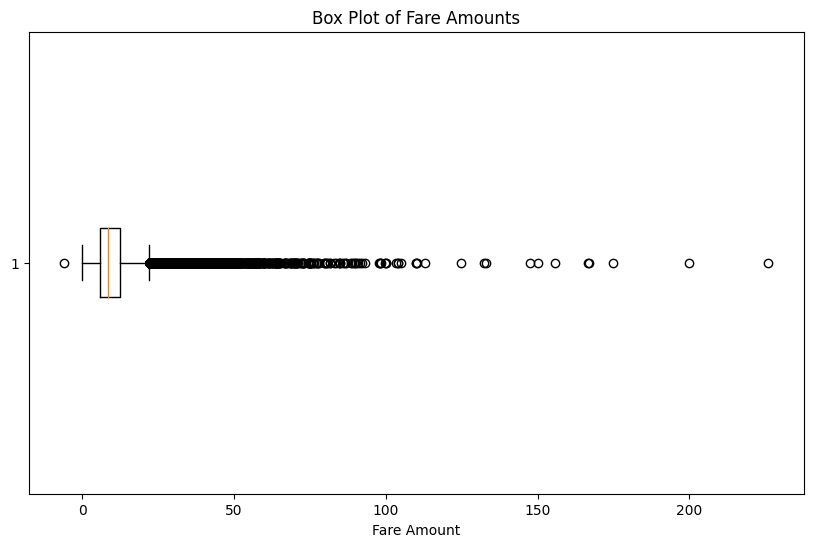

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(Train_data['fare_amount'], vert=False)
plt.xlabel('Fare Amount')
plt.title('Box Plot of Fare Amounts')
plt.show()

In [ ]:
print("median: ",Train_data["fare_amount"].median())
print("max: ",Train_data["fare_amount"].max())
print("min: ",Train_data["fare_amount"].min())

median:  8.5
max:  226.0
min:  -6.0


In [ ]:
Q1 = Train_data['fare_amount'].quantile(0.25)
Q3 = Train_data['fare_amount'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

# Filter out outliers
Train_data = Train_data[(Train_data['fare_amount'] >= lower_bound) & (Train_data['fare_amount'] <= upper_bound)]

Lower Bound: 0
Upper Bound: 22.25


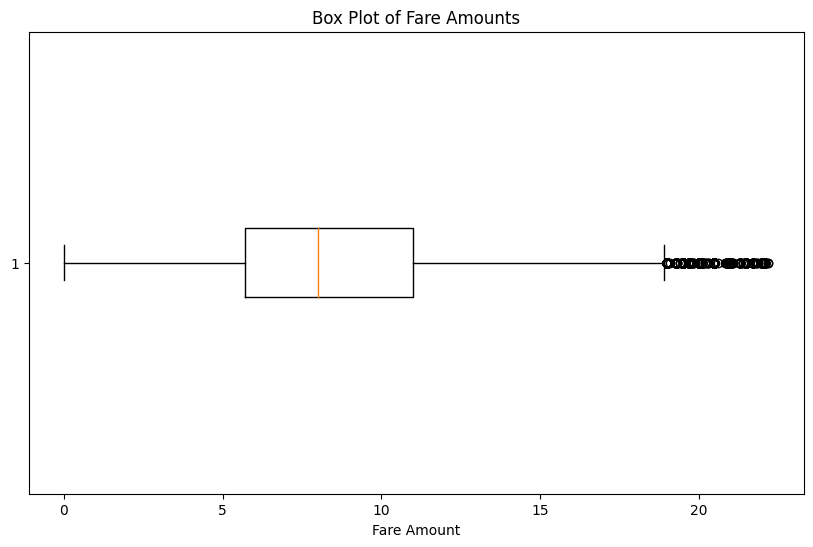

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(Train_data['fare_amount'], vert=False)
plt.xlabel('Fare Amount')
plt.title('Box Plot of Fare Amounts')
plt.show()

In [ ]:
print("median: ",Train_data["fare_amount"].median())
print("max: ",Train_data["fare_amount"].max())
print("min: ",Train_data["fare_amount"].min())

median:  8.0
max:  22.2
min:  0.0


# Passenger_count filtering

იმის გათვალისწინებით რომ Test_data-ში passenger count მინიმუმი არის 1 და დავალებაც გულისხმობს ტაქსით გადაადგილების ფასების წინასწარმეტყველებას, ვთვლი რომ ამ ეტაპზე 0 passenger count შემიძლია ამ კონკრეტული მოდელიდან ამოვიღო და delivery Fare მოდელი სხვა დროს გავაკეთო. ან 0 passenger-ები ვაქციო 1 passenger-ებად.



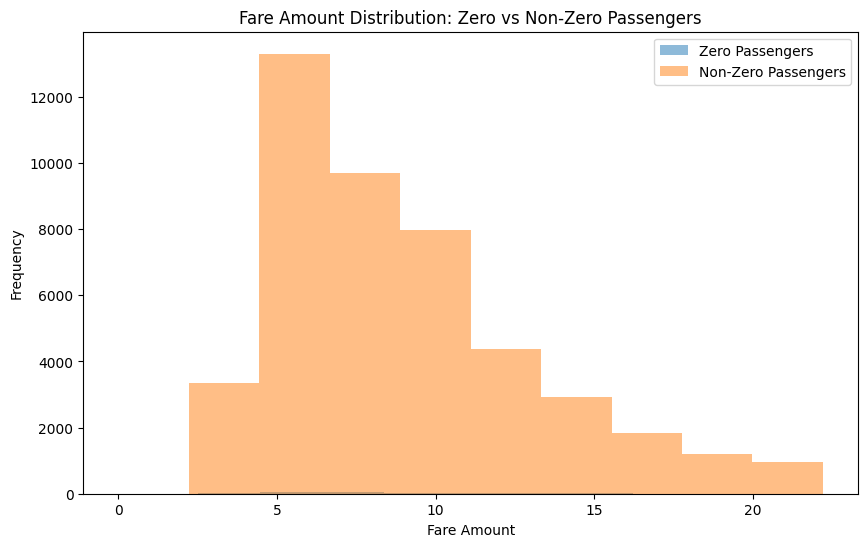

In [ ]:
zero_passenger_fares = Train_data[Train_data['passenger_count'] == 0]['fare_amount']
non_zero_passenger_fares = Train_data[Train_data['passenger_count'] > 0]['fare_amount']

plt.figure(figsize=(10, 6))
plt.hist(zero_passenger_fares, bins=10, alpha=0.5, label='Zero Passengers')
plt.hist(non_zero_passenger_fares, bins=10, alpha=0.5, label='Non-Zero Passengers')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()
plt.title('Fare Amount Distribution: Zero vs Non-Zero Passengers')
plt.show()

დავტოვე 1 დან 6 ჩათვლით რადგან ტესტ ფაილშიც მინიმუმი არის 1 და მაქსიმუმი 6. Train data-ში კი 7,8,9 passenger იყო რამდენიმე ასეული მხოლოდ.

In [ ]:
Train_data["passenger_count"].value_counts()

,count
passenger_count,
1,31660
2,6808
5,3287
3,1945
4,1001
6,936
0,166


In [ ]:
Train_data = Train_data[Train_data["passenger_count"].isin([1,2,3,4,5,6])]

In [ ]:
Train_data["passenger_count"].value_counts()

,count
passenger_count,
1,31660
2,6808
5,3287
3,1945
4,1001
6,936


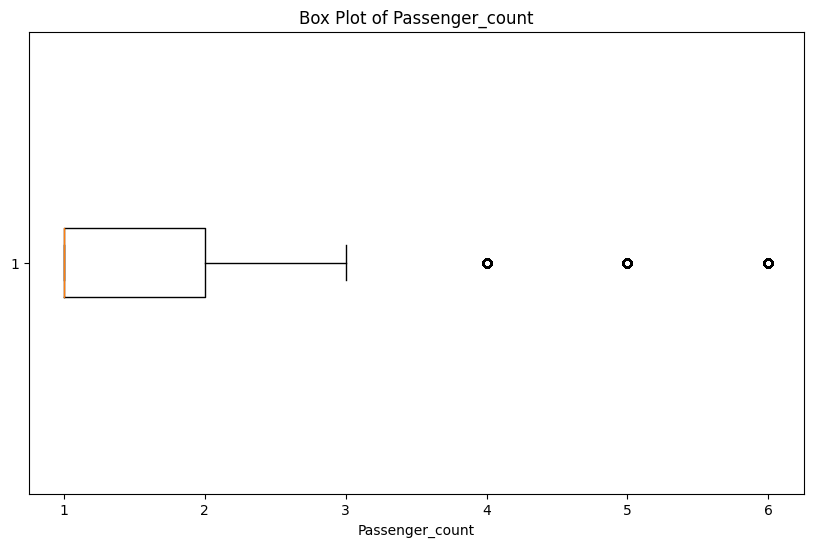

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(Train_data['passenger_count'], vert=False)
plt.xlabel('Passenger_count')
plt.title('Box Plot of Passenger_count')
plt.show()

# Latitude & Longitude:  considering we have pickup and dropoff lats and longs we can calculate the distance using haversine. (first need to filter lats and longs for accepted format)
lattitude should be between -180 & 180
longitude  should be between -90 & 90

In [ ]:
print(Train_data.pickup_latitude[Train_data.pickup_latitude>90].count())
print(Train_data.pickup_latitude[Train_data.pickup_latitude<-90].count())
print(Train_data.dropoff_latitude[Train_data.dropoff_latitude>90].count())
print(Train_data.dropoff_latitude[Train_data.dropoff_latitude<-90].count())

1
0
1
0


In [ ]:
print(Train_data.pickup_longitude[Train_data.pickup_longitude>180].count())
print(Train_data.pickup_longitude[Train_data.pickup_longitude<-180].count())
print(Train_data.dropoff_longitude[Train_data.dropoff_longitude>180].count())
print(Train_data.dropoff_longitude[Train_data.dropoff_longitude<-180].count())

0
0
0
0


In [ ]:
Train_data.drop(Train_data[(Train_data.pickup_latitude > 90) | (Train_data.pickup_latitude < -90)].index, inplace=True)
Train_data.drop(Train_data[(Train_data.dropoff_latitude > 90) | (Train_data.dropoff_latitude < -90)].index, inplace=True)
Train_data.drop(Train_data[(Train_data.pickup_longitude > 180) | (Train_data.pickup_longitude < -180)].index, inplace=True)
Train_data.drop(Train_data[(Train_data.dropoff_longitude > 180) | (Train_data.dropoff_longitude < -180)].index, inplace=True)

<ipython-input-208-31d7dd69d2c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data.drop(Train_data[(Train_data.pickup_latitude > 90) | (Train_data.pickup_latitude < -90)].index, inplace=True)
<ipython-input-208-31d7dd69d2c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data.drop(Train_data[(Train_data.dropoff_latitude > 90) | (Train_data.dropoff_latitude < -90)].index, inplace=True)


ჰავერსინით დავითვლი დისტანცია, გავაკეთე შესაბამისი ფუნქცია რომელსაც მოვარგებ ყველა Row-ს მონაცემების

In [ ]:
def calculate_distance(row):
    pickup_location = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff_location = (row['dropoff_latitude'], row['dropoff_longitude'])
    return haversine(pickup_location, dropoff_location, unit=Unit.KILOMETERS)

მონაცემებში ვამატებ მანძილის სვეტს და ვითვლი შესაბამის მანძილს გრძედზე და განედზე დაყრდნობით

In [ ]:
Train_data["distance"]=Train_data.apply(calculate_distance,axis=1)

In [ ]:
Test_data["distance"]=Test_data.apply(calculate_distance,axis=1)

In [ ]:
Test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,month,year,time_of_day,is_weekend,rush_hour,distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,13,1,27,1,2015,0,0,0,2.323263
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,13,1,27,1,2015,0,0,0,2.425356
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,11,5,8,10,2011,2,1,0,0.618629
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,21,5,1,12,2012,1,1,0,1.961035
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,21,5,1,12,2012,1,1,0,5.387309


In [ ]:
Test_data.dtypes

,0
key,object
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day_of_week,int32
day_of_month,int32


In [ ]:
Q1 = Train_data['distance'].quantile(0.25)
Q3 = Train_data['distance'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = 0.5
upper_bound = Q3 + (1.5 * IQR)

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

# Filter out outliers
Train_data = Train_data[(Train_data['distance'] >= lower_bound) & (Train_data['distance'] <= upper_bound)]

Lower Bound: 0.5
Upper Bound: 6.457768047159184


# Trying to improve overfit

In [ ]:
Train_data['distance_passenger_interaction'] = Train_data['distance'] * Train_data['passenger_count']

<ipython-input-215-9eb0a09ea1c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data['distance_passenger_interaction'] = Train_data['distance'] * Train_data['passenger_count']


In [ ]:
Test_data['distance_passenger_interaction'] = Test_data['distance'] * Test_data['passenger_count']

# Relationship between features and Fare amount


In [ ]:
Train_data.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'hour', 'day_of_week', 'day_of_month', 'month',
       'year', 'time_of_day', 'is_weekend', 'rush_hour', 'distance',
       'distance_passenger_interaction'],
      dtype='object')

In [ ]:
key=Train_data.pop("key")

In [ ]:

# Calculate the correlation matrix
corr_matrix = Train_data.corr()


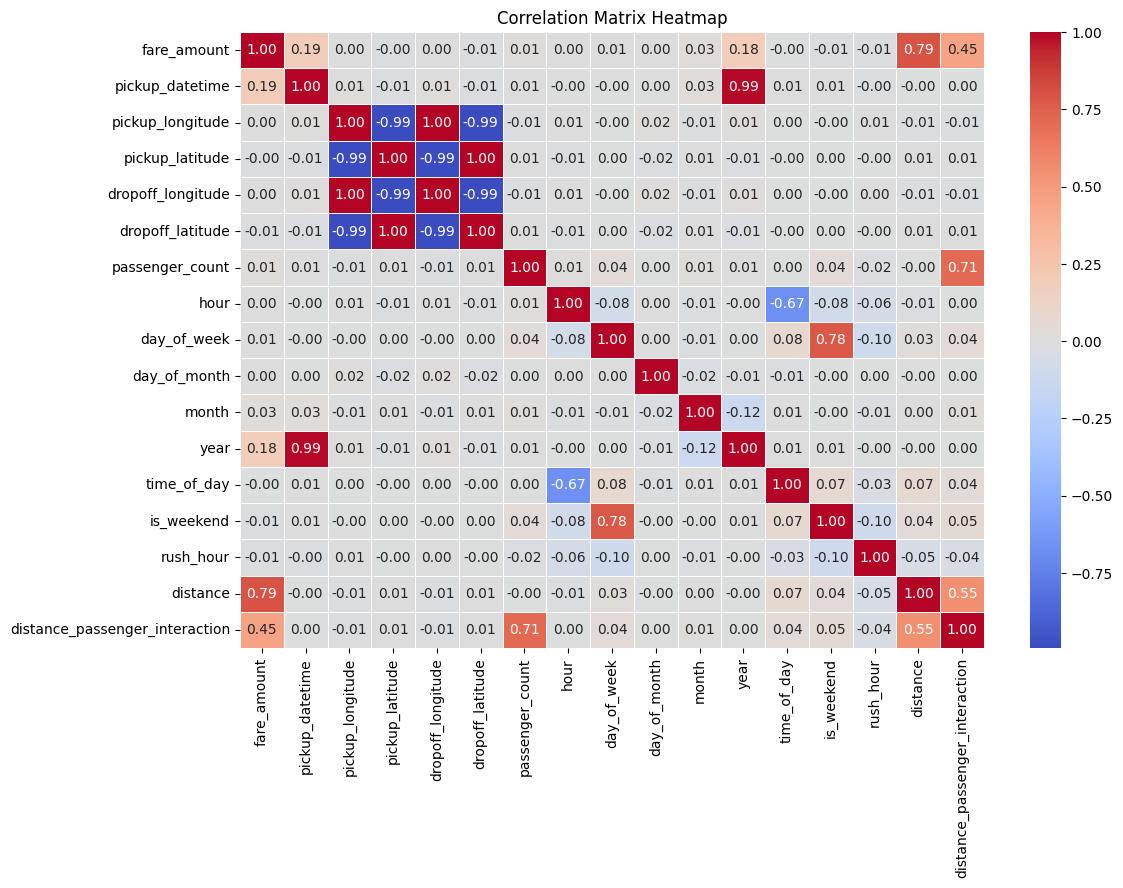

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

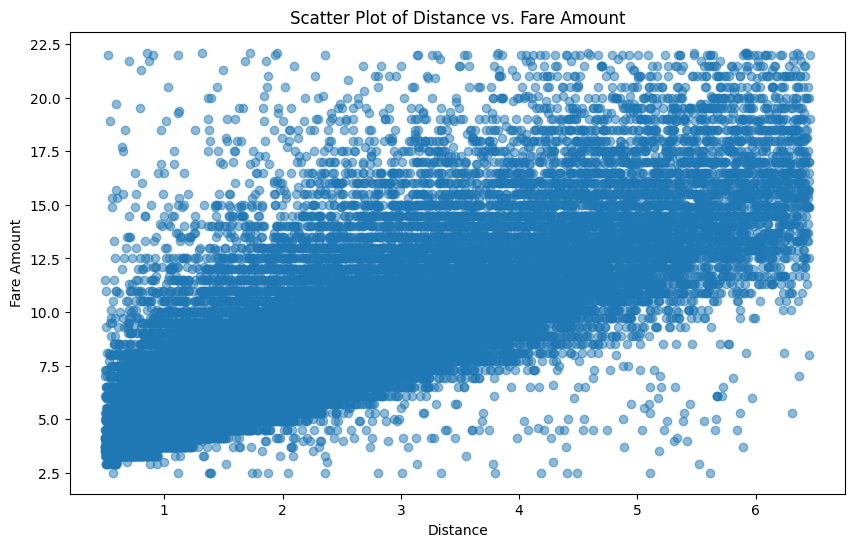

In [ ]:
#scatter plot for distance
plt.figure(figsize=(10, 6))
plt.scatter(Train_data['distance'], Train_data['fare_amount'], alpha=0.5)
plt.title('Scatter Plot of Distance vs. Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()

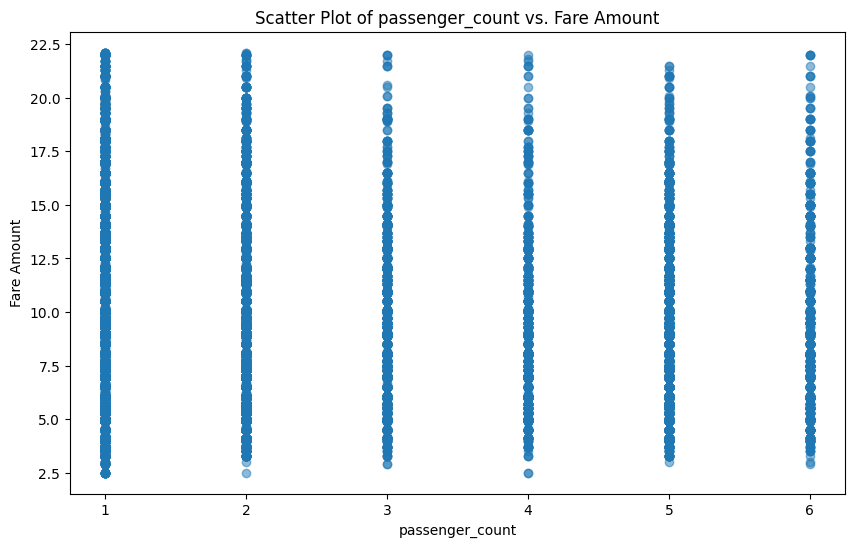

In [ ]:
#scatter plot for passenger_count
plt.figure(figsize=(10, 6))
plt.scatter(Train_data['passenger_count'], Train_data['fare_amount'], alpha=0.5)
plt.title('Scatter Plot of passenger_count vs. Fare Amount')
plt.xlabel('passenger_count')
plt.ylabel('Fare Amount')
plt.show()

# splitting train data with X,y train-test split, also got Test data of the competition as validation test

In [ ]:
Train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,month,year,time_of_day,is_weekend,rush_hour,distance,distance_passenger_interaction
count,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000,40861.000000
mean,8.686573,-73.924760,40.698777,-73.923441,40.699024,1.691270,13.586770,3.022882,15.753188,6.275446,2011.733413,1.196716,0.280536,0.284697,2.354920,3.977819
std,3.666210,2.489293,2.432689,2.489324,2.432762,1.305195,6.426118,1.947259,8.668835,3.443456,1.865031,0.985092,0.449267,0.451275,1.396330,4.247492
min,2.500000,-74.366598,-74.002072,-74.419495,-74.004812,1.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.500206,0.500206
25%,6.000000,-73.992562,40.737678,-73.991843,40.737755,1.000000,9.000000,1.000000,8.000000,3.000000,2010.000000,0.000000,0.000000,0.000000,1.256240,1.515810
50%,8.000000,-73.982506,40.753205,-73.981702,40.754055,1.000000,14.000000,3.000000,16.000000,6.000000,2012.000000,1.000000,0.000000,0.000000,1.981434,2.608118
75%,10.500000,-73.970816,40.766630,-73.969218,40.767200,2.000000,19.000000,5.000000,23.000000,9.000000,2013.000000,2.000000,1.000000,1.000000,3.140718,4.668628
max,22.100000,40.775827,40.962130,40.799670,40.946118,6.000000,23.000000,6.000000,31.000000,12.000000,2015.000000,3.000000,1.000000,1.000000,6.457751,38.505800


In [ ]:
Test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,day_of_month,month,year,time_of_day,is_weekend,rush_hour,distance,distance_passenger_interaction
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,13.467420,2.852834,16.194170,6.857979,2011.815816,1.221202,0.272040,0.352431,3.435375,5.880452
std,0.042774,0.033541,0.039072,0.035435,1.278747,6.868584,1.994451,8.838482,3.353272,1.803347,1.017545,0.445033,0.477751,3.972380,9.876845
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,8.000000,1.000000,9.000000,4.000000,2010.000000,0.000000,0.000000,0.000000,1.298279,1.561149
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,15.000000,3.000000,16.000000,7.000000,2012.000000,1.000000,0.000000,0.000000,2.217415,2.957657
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,19.000000,5.000000,25.000000,10.000000,2014.000000,2.000000,1.000000,1.000000,4.045307,6.176427
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,23.000000,6.000000,31.000000,12.000000,2015.000000,3.000000,1.000000,1.000000,99.996178,294.577664


In [ ]:
subs.describe()

,fare_amount
count,9.914000e+03
mean,1.135000e+01
std,3.552893e-15
min,1.135000e+01
25%,1.135000e+01
50%,1.135000e+01
75%,1.135000e+01
max,1.135000e+01


In [ ]:
# @title removed distance and distance_passenger feature since it had the highest importance and model tend to overfit, have to look for a way to regularize it somehow and use again
X=Train_data.drop(columns=['fare_amount','pickup_datetime'])
y=Train_data["fare_amount"]
Test_data=Test_data.drop(columns=['key','pickup_datetime'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)

# Random Forest model parameters modified manually ( want to try them on larger data)

In [ ]:
params = {
    'max_depth': 6,
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'min_samples_split': 20,
    'n_estimators': 300,
    'random_state': 92
}

# Instantiate the Random Forest model with specified parameters
rf_model = RandomForestRegressor(**params)

# Now you can fit your model to the data and use it for predictions
rf_model.fit(X_train, y_train)

# Example: Predicting on a test set
y_pred = rf_model.predict(X_test)


In [ ]:
mae_RF = mean_absolute_error(y_test, y_pred)
mape_RF = mean_absolute_percentage_error(y_test, y_pred)


print(f'Mean Absolute Error (MAE): {mae_RF}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_RF}')

# Random forest (best model for now / used the gridsearch)
Mean Absolute Error (MAE): 2.9612899717552654
Mean Absolute Percentage Error (MAPE): 0.26090660544099253

In [ ]:
Forest_model = RandomForestRegressor(random_state=92)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
grid_search_rf = GridSearchCV(estimator=Forest_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

In [ ]:
grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
243 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
89 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=92), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print("Best parameters found: ", grid_search_rf.best_params_)

Best parameters found:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
predictions_rf = grid_search_rf.predict(X_test)

In [ ]:
mae_RF = mean_absolute_error(y_test, predictions_rf)
mape_RF = mean_absolute_percentage_error(y_test, predictions_rf)


print(f'Mean Absolute Error (MAE): {mae_RF}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_RF}')

Mean Absolute Error (MAE): 2.0169356245075374
Mean Absolute Percentage Error (MAPE): 0.2693342907997596


In [ ]:
best_rf_model = grid_search_rf.best_estimator_

In [ ]:
importances = best_rf_model.feature_importances_

# Get feature names from X_train columns
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

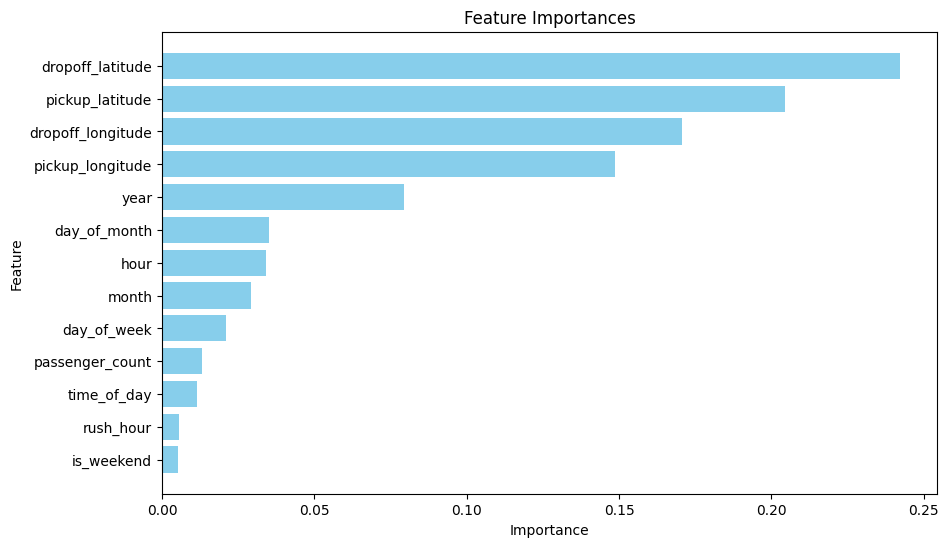

In [ ]:
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
Train_data.dtypes

,0
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
hour,int32
day_of_week,int32
day_of_month,int32


In [ ]:
predictions_rf_test = grid_search_rf.predict(Test_data)

In [ ]:
mae_RF = mean_absolute_error(subs, predictions_rf_test)
mape_RF = mean_absolute_percentage_error(subs, predictions_rf_test)


print(f'Mean Absolute Error (MAE): {mae_RF}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_RF}')

Mean Absolute Error (MAE): 2.9612899717552654
Mean Absolute Percentage Error (MAPE): 0.26090660544099253


# XGB
Mean Absolute Error (MAE): 1.173685643878147
Mean Absolute Percentage Error (MAPE): 0.156110080434405

In [ ]:
#შევცვალო გამა ლამბდა და თუ არ უშველის 100 000-ზე დავატრენინგო
xgb_model = xgb.XGBRegressor(
    colsample_bytree=1.0,
    gamma=0.1, #გავზარდო 10-მდე
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=3,
    n_estimators=300,
    reg_lambda=10,
    reg_alpha=0.1,
    subsample=0.8,
    random_state=42  # Optional: to ensure reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

In [ ]:
mae_grid = mean_absolute_error(y_test, y_pred)
mape_grid = mean_absolute_percentage_error(y_test, y_pred)


print(f'Mean Absolute Error (MAE): {mae_grid}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_grid}')

Mean Absolute Error (MAE): 1.2053262859590925
Mean Absolute Percentage Error (MAPE): 0.14556844471406213


In [ ]:
y_pred_test = xgb_model.predict(Test_data)


In [ ]:
mae_grid = mean_absolute_error(subs, y_pred_test)
mape_grid = mean_absolute_percentage_error(subs, y_pred_test)


print(f'Mean Absolute Error (MAE): {mae_grid}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_grid}')

Mean Absolute Error (MAE): 4.059485514028817
Mean Absolute Percentage Error (MAPE): 0.357663921940865


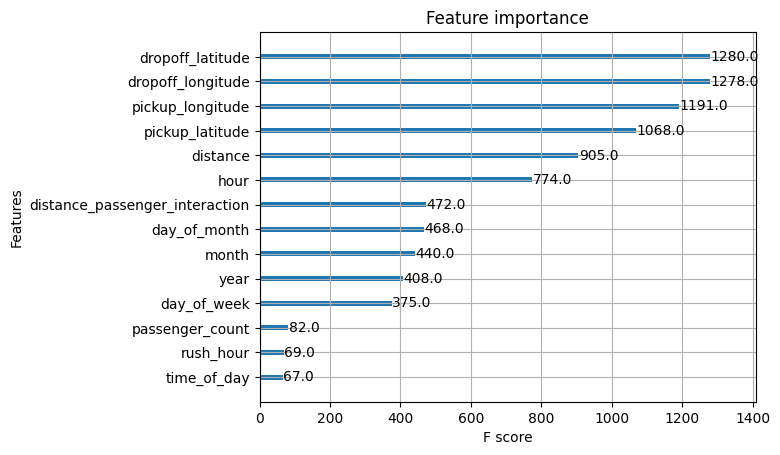

In [ ]:
xgb.plot_importance(xgb_model)
plt.show()

# gridsearch

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror')

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_lambda': [0.1, 1, 10]
}

In [ ]:
grid_search_xgb = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=2, n_jobs=-1)

In [ ]:
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_lambda': [0.1, 1, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
best_model_xgb = grid_search_xgb.best_estimator_

In [ ]:
predictions_xgb = best_model_xgb.predict(X_test)

In [ ]:
mae_grid = mean_absolute_error(y_test, predictions_xgb)
mape_grid = mean_absolute_percentage_error(y_test, predictions_xgb)

print(f'Best Parameters: {grid_search_xgb.best_params_}')
print(f'Mean Absolute Error (MAE): {mae_grid}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_grid}')

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300, 'reg_lambda': 10, 'subsample': 0.8}
Mean Absolute Error (MAE): 1.2576703209295335
Mean Absolute Percentage Error (MAPE): 0.1551344006147322


In [ ]:
best_model_xgb.feature_importances_

array([0.1456972 , 0.20417514, 0.14048834, 0.19554016, 0.01893878,
       0.03921317, 0.03005735, 0.02116718, 0.02923634, 0.12742068,
       0.02922362, 0.        , 0.01884194], dtype=float32)

In [ ]:
Test_data=Test_data.drop(columns=['key','pickup_datetime'])

KeyError: "['key', 'pickup_datetime'] not found in axis"

In [ ]:
Test_data.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day_of_week',
       'day_of_month', 'month', 'year', 'time_of_day', 'is_weekend',
       'rush_hour'],
      dtype='object')

In [ ]:
subs.head()

In [ ]:
test_preds = best_model_xgb.predict(Test_data)
mae_grid = mean_absolute_error(test_preds, subs)
mape_grid = mean_absolute_percentage_error(test_preds, subs)

print(f'Best Parameters: {grid_search_xgb.best_params_}')
print(f'Mean Absolute Error (MAE): {mae_grid}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_grid}')

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 300, 'reg_lambda': 10, 'subsample': 0.8}
Mean Absolute Error (MAE): 4.058260754488494
Mean Absolute Percentage Error (MAPE): 0.5323977432480013


# Linear Regression

In [ ]:
reg_model = LinearRegression()


reg_model.fit(X_train, y_train)


Test_preds = reg_model.predict(Test_data)


mse = mean_squared_error(subs, Test_preds)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(subs, Test_preds)
print(f'Mean Absolute Error: {mae}')
mape = np.mean(np.abs((subs - Test_preds) / subs)) * 100
print(f'MAPE: {mape:.2f}%')

In [ ]:
დავამატო distance feature და დავალოგარითმო